# Thompson Sampling

**Thompson Sampling** is another algorithm to solve **Multi-Armed Bandits Problem.** Before introducing this algorithm, we need to be familiar with **beta distribution**.

### Beta Distribution

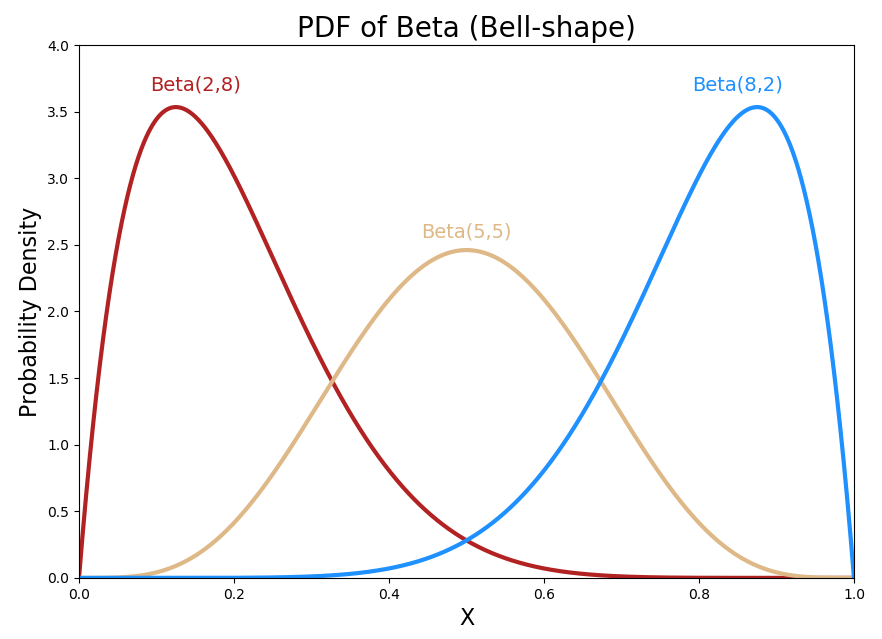

**Beta distribution**: continuous probability distributions set on the interval [0, 1] having **two positive shape parameters, expressed by α and β**. These two parameters appear as exponents of the random variable and manage the shape of the distribution. Here are the formula for **Beta(a+1,b+1)**:
$$
f(x) = \dfrac{x^a(1-x)^b}{B(a+1, b+1)}
$$
In brief, **a** usually represents the **number of positive outcomes** and **b** represents the **number of negative outcomes** (such as the heads and tails in flipping a coin). And **x represents the probability of having positive outcome** (such as the probability of gettting a head when flipping a coin); thus, to get a **probability density function** for this, we need to divide the area under the curve which is done by B(a+1, b+1)<br>
**Note: the more flips on the coin, the tigher the distribution centered around the true probability.**

By utilizing above properties of beta distribution, here are the steps of Thompson Sampling:<br>
$N_i^1(n)$ = the number of times the **machine m got reward 1 up to round n**<br>
$N_i^0(n)$ = the number of times the **machine m got reward 0 up to round n**<br>
1.   Select the machine $m$ that has the **highest probabilty among the probability resulted by randomly select x in their corresponding beta distribution** which is calculated by $Θ_i(n) = β(N_i^1(n) + 1, N_i^0(n) + 1)$
2.   **Repeat above steps until a certain limit** and the machine in the final result having the **highest probability** will be the result.



## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Importing the dataset

In [5]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [7]:
# number of users
N = dataset.shape[0]
# number of ads we are testing on
d = dataset.shape[1]
# list tracking number of reward 1 for each ad
numbers_of_rewards_0 = [0] * d
# list tracking number of reward 0 for each ad
numbers_of_rewards_1 = [1] * d

for n in range(1, N + 1):
  # these two variables tracking the ad with the maximum probability
  ad = 0
  max_random = 0

  for i in range(d):
    # return a random probability within [0, 1] from corresponding beta distribution resulted from reward_1 and reward_0
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)

    # record current max probability and index of its ad
    if (random_beta > max_random):
      max_random = random_beta
      ad = i

  # after determing the maximum probability
  # update the reward for this ad
  reward = dataset.iloc[n - 1, ad]
  if (reward == 1):
    numbers_of_rewards_1[ad] += 1
  else:
    numbers_of_rewards_0[ad] += 1

  # Output the final result with the highest probability
  if (n == N):
    print(max_random)
    print(ad)

0.26769364996193873
4


Hence, ad 4 would have the highest probability and we would select 4 to be our advertisement.